In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [4]:
normal_cells=os.listdir(r'F:\AI & ML\CNN\BrainTumor\no')

In [5]:
print(normal_cells[0:5])
print(normal_cells[-5:])

['1 no.jpeg', '10 no.jpg', '11 no.jpg', '12 no.jpg', '13 no.jpg']
['No18.jpg', 'No19.jpg', 'No20.jpg', 'No21.jpg', 'No22.jpg']


In [6]:
tumor_cells=os.listdir(r'F:\AI & ML\CNN\BrainTumor\yes')

In [7]:
print(tumor_cells[:5])

['Y1.jpg', 'Y10.jpg', 'Y100.JPG', 'Y101.jpg', 'Y102.jpg']


In [8]:
len(tumor_cells),len(normal_cells)

(155, 98)

# Assign the labels to the normal and tumor cells

#### Normal Cells -> 0
#### Tumor Cells-> 1

In [9]:
normal_labels=[0]*98
tumor_labels=[1]*155

In [10]:
print(normal_labels[0:5])
print(tumor_labels[0:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


# Combine the lebels

In [11]:
label=normal_labels+tumor_labels

In [12]:
print(type(label))
len(label)

<class 'list'>


253

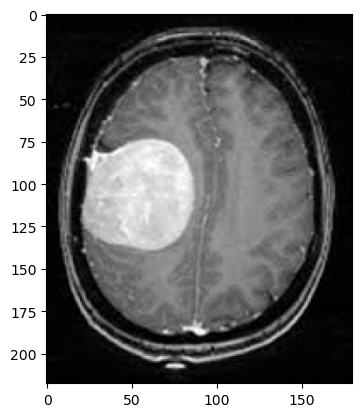

In [13]:
img=r'F:\AI & ML\CNN\BrainTumor\yes\Y1.jpg'
im=Image.open(img)
plt.imshow(im)
plt.show()

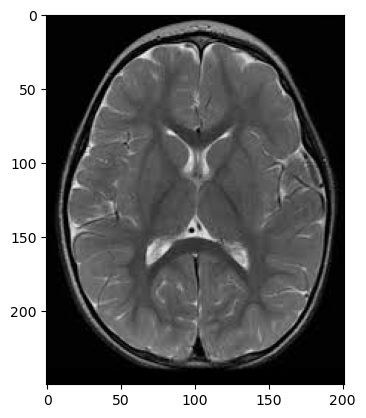

In [14]:
img=r'F:\AI & ML\CNN\BrainTumor\no\4 no.jpg'
im=Image.open(img)
plt.imshow(im)
plt.show()

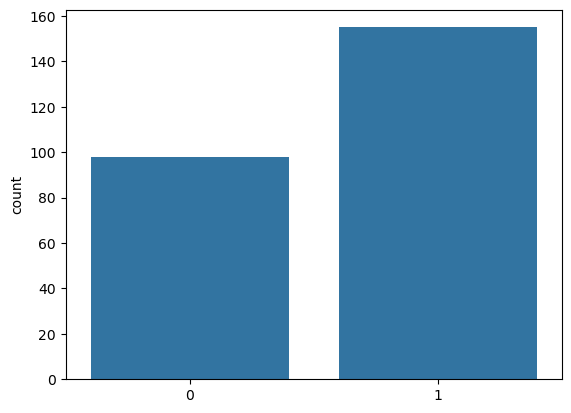

In [15]:
import seaborn as sns
sns.countplot(x=label)
plt.show()

In [23]:
data=[]

# Reshape the images

In [24]:
normal_cells_path = r'F:\AI & ML\CNN\BrainTumor\no'

for files in normal_cells:
    image_path = os.path.join(normal_cells_path, files)
    image=Image.open(image_path)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

In [25]:
len(data)

98

In [26]:
tumo_cells_path=r'F:\AI & ML\CNN\BrainTumor\yes'
for files in tumor_cells:
    image_path = os.path.join(tumo_cells_path, files)
    image=Image.open(image_path)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

In [27]:
# data=data.clear()

In [28]:
len(data)

253

In [29]:
data

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [31]:
data[0].shape

(128, 128, 3)

In [32]:
type(data)

list

In [33]:
type(label)

list

# Convert both into numpy array

In [34]:
X=np.array(data)
y=np.array(label)

In [35]:
type(X),type(y)

(numpy.ndarray, numpy.ndarray)

# Normalize the data set

In [36]:
X=X/255
y=y/255

# Split the dataset

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [39]:
X_train.shape,X_test.shape

((202, 128, 128, 3), (51, 128, 128, 3))

# Model Building

In [42]:
import tensorflow as tf
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D,Flatten

In [54]:
import keras_tuner
from tensorflow import keras

In [69]:
def model_building(hp):
    model=Sequential([
        Conv2D(
            filters=hp.Int('conv_1_filtter',min_value=32,max_value=128,step=16),
            kernel_size=hp.Choice('conv_1_kernel',values=[3,5]),
            activation='relu',
            input_shape=(128,128,3)
        ),
        BatchNormalization(),
        MaxPooling2D(pool_size=hp.Choice('max_1',values=[2,3,5])),
        Conv2D(
            filters=hp.Int('conv_2_filter',min_value=48,max_value=64,step=2),
            kernel_size=hp.Choice('conv_2_kernel',values=[3,5]),
            activation='relu',
        ),
        BatchNormalization(),
        MaxPooling2D(pool_size=hp.Choice('max_2',values=[2,3,5])),
        Flatten(),
        Dense(
            units=hp.Int('dense_1',min_value=64,max_value=128,step=8),
            activation='relu'
        ),
        Dense(1,activation='sigmoid')
    ])
    
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='binary_crossentropy',
              metrics=['accuracy']),
    
    return model
    

In [70]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [71]:
tuner_search=RandomSearch(model_building,objective='val_accuracy',max_trials=5,directory='output',project_name="BrainTumor")

Reloading Tuner from output\BrainTumor\tuner0.json


In [72]:
tuner_search.search(X_train,y_train,epochs=10,validation_split=0.1)

Trial 5 Complete [00h 01m 43s]
val_accuracy: 0.4761904776096344

Best val_accuracy So Far: 0.4761904776096344
Total elapsed time: 00h 13m 25s


# Not perform well on hyperparamter please invoke model manually

In [73]:
model_one=Sequential()

In [74]:
num_of_classes=2

model_one=Sequential()

model_one.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model_one.add(MaxPooling2D(pool_size=(2,2)))

model_one.add(Flatten())

model_one.add(Dense(128, activation='relu'))

model_one.add(Dense(num_of_classes, activation='sigmoid'))

In [75]:
model_one.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [77]:
history=model_one.fit(X_train,y_train,validation_split=0.1,epochs=50,verbose=1)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4135 - loss: 0.0000e+00 - val_accuracy: 0.4762 - val_loss: 0.0000e+00
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3890 - loss: 0.0000e+00 - val_accuracy: 0.4762 - val_loss: 0.0000e+00
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.3644 - loss: 0.0000e+00 - val_accuracy: 0.4762 - val_loss: 0.0000e+00
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3866 - loss: 0.0000e+00 - val_accuracy: 0.4762 - val_loss: 0.0000e+00
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4152 - loss: 0.0000e+00 - val_accuracy: 0.4762 - val_loss: 0.0000e+00
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3785 - loss: 0.0000e+00 - val_accuracy: 0.4762 - val_loss: 0.0000e+00
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3647 - loss: 0.0000e+00 - val_accuracy: 0.4762 - val_loss: 0.0000e+00
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3875 - loss: 0.0000e

6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.3495 - loss: 0.0000e+00 - val_accuracy: 0.4762 - val_loss: 0.0000e+00


In [78]:
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_val_encoded = tf.keras.utils.to_categorical(y_val, num_classes=2)

NameError: name 'y_val' is not defined